# Model Calibration

## Imports and Setup

In [2]:
import os 
os.chdir('/home/itingzon.unicef/giga')
from utils import config_utils
from utils import calib_utils
from utils import post_utils

import pandas as pd
import numpy as np
import geopandas as gpd

pd.set_option('mode.chained_assignment', None)
%load_ext autoreload
%autoreload 2

## Load Configuration

In [31]:
iso_code = "SEN"
config_file = "configs/cnn_configs/convnext_large_v01.yaml"
config = config_utils.load_config(os.path.join(os.getcwd(), config_file))
config["iso_codes"] = [iso_code]

## Model Calibration

In [32]:
results = calib_utils.compare_calibrators(iso_code, config, n_bins=10)
results = pd.DataFrame(results).T.apply(lambda x: round(x, 5))
results

,val_ace,val_ece,val_mce,val_nll,val_briers,test_ace,test_ece,test_mce,test_nll,test_briers
Uncalibrated,0.15812,0.02575,0.35882,0.13276,0.03272,0.10792,0.03016,0.28319,0.13861,0.03543
IsotonicRegression,0.00000,0.00000,0.00000,0.11106,0.02909,0.15625,0.01105,0.78300,0.15666,0.03394
TemperatureScaling,0.17224,0.01889,0.42256,0.12936,0.03287,0.10054,0.01875,0.28686,0.13442,0.03560
HistogramBinning,0.00000,0.00000,0.00000,0.12700,0.03014,0.08734,0.01203,0.18783,0.13378,0.03449
LogisticCalibration,0.10112,0.00961,0.28271,0.12447,0.03129,0.06785,0.01323,0.21598,0.12937,0.03421
BetaCalibration,0.09881,0.00756,0.20478,0.12382,0.03094,0.08768,0.01248,0.22621,0.12941,0.03422
BBQ,0.00070,0.00011,0.00200,0.13295,0.03120,0.05375,0.00907,0.12008,0.14591,0.03662
ENIR,0.01242,0.00432,0.08129,0.18245,0.02864,0.06527,0.01502,0.20161,0.43306,0.03823


## Load Model Calibrator

In [34]:
calibrator_name = "LogisticCalibration"
calibrator = calib_utils.load_calibrator(iso_code, config, calibrator_name)
calibrator

LogisticCalibration(_default_independent_probabilities=False,
                    _device=device(type='cpu'),
                    _sites=OrderedDict([('weights',
                                         {'constraint': Real(),
                                          'init': {'mean': tensor([1.], dtype=torch.float64),
                                                   'scale': tensor([1.], dtype=torch.float64)},
                                          'prior': Independent(Normal(loc: tensor([1.], dtype=torch.float64), scale: tensor([10.], dtype=torch.float64)), 1),
                                          'values': arr...
                                          'prior': Independent(Normal(loc: tensor([0.], dtype=torch.float64), scale: tensor([10.], dtype=torch.float64)), 1),
                                          'values': array([-0.57114761])})]),
                    detection=False, independent_probabilities=False,
                    mask_negative=False, mcmc_chains=1, mcmc_model=None,
                    mcmc_steps=250, mcmc_warmup=100, method='mle',
                    momentum_epochs=1000, num_classes=2, num_features=1,
                    vi_epochs=1000, vi_model=None)

## Plot Results

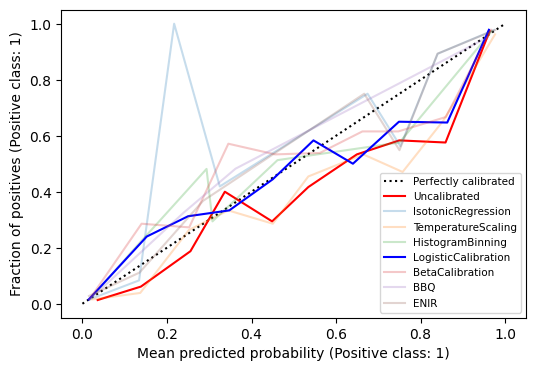

In [35]:
calib_utils.calibration_curves(iso_code, config, highlight=calibrator_name, n_bins=10)

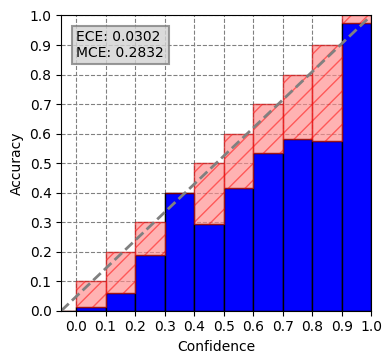

In [36]:
output = calib_utils.get_calibrator_outputs(iso_code, config, calibrator_name, phase="test")
calib_utils.reliability_diagram(output["y_probs"], output["y_true"], n_bins=10)

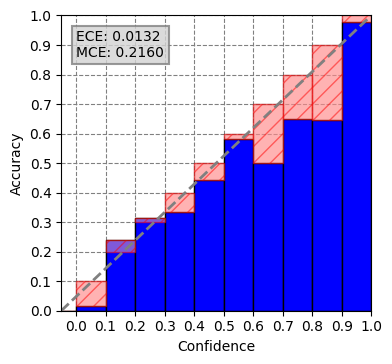

In [37]:
calib_utils.reliability_diagram(output["y_probs_cal"], output["y_true"], n_bins=10)